# T-test

In [2]:
import sys, os
def importOwnLib():
    if '/home/miruware/aProjects/lib' not in sys.path:
        sys.path.append('/home/miruware/aProjects/lib')
        print("lib path is successfully appended.")
    else:
        print("lib path is already exists.")

importOwnLib()
import sonyalib as sonya
import importlib
importlib.reload(sonya)

lib path is successfully appended.


<module 'sonyalib' from '/home/miruware/aProjects/lib/sonyalib.py'>

In [3]:
sonya.test()

LIBRARY TEST : 20201202-135258


In [4]:
import numpy as np
from scipy import stats
import seaborn as sns
import random
import matplotlib.pyplot as plt

## 1-Sample T-test (단일 표본 t-검정)
전체 학생들 중 20명의 학생들을 추려 키를 재서 전체 학생들의 평균 키가 175cm인지 아닌지 알아보고 싶다.<br>
- 귀무 가설: 학생들의 평균 키가 175cm이다.
- 대립 가설: 학생들의 평균 키가 175cm가 아니다.  


scipy.stats의 ttest_1samp메소드를 이용한다



In [6]:
import numpy as np
from scipy import stats
 
#to get consistent result
np.random.seed(1)
 
#generate 20 random heights with mean of 180, standard deviation of 5
heights= [180 + np.random.normal(0,5)for _ in range(20)]
 
#perform 1-sample t-test
tTestResult = stats.ttest_1samp(heights,175)
 
#print result
print("The T-statistic is %.3f and the p-value is %.3f" % tTestResult)

The T-statistic is 3.435 and the p-value is 0.003


p-value 가 0.003으로, 기각역을 p < 0.05로 설정했을 때 귀무 가설을 기각한다. 즉, 귀무 가설이 참일때 (학생들의 실제 평균 키가 175cm일때) 위와 같은 표본을 얻을 확률이 0.003으로, 학생들의 평균 키는 175cm가 아니라고 할 수 있다.

## Unpaired T-test(독립 표본 t-검정)
집단 1과 집단 2에서 각각 20명의 학생들을 추려, 각 집단의 키가 같은지, 다른지 알아보고 싶다.<br>
- 귀무 가설: 두 집단의 평균 키는 같다.
- 대립 가설: 두 집단의 평균 키는 같지 않다.(양측 검정).  


scipy.stats 의 ttest_ind 메소드를 이용한다. (two INDependent sample이라 해서 ttest_ind )

In [15]:
import numpy as np
from scipy import stats
 
#to get consistent result
np.random.seed(1)
 
#group 1 heights : mean 170, standard deviation 5
group1Heights= [170 + np.random.normal(0,5)for _ in range(20)]
#group 2 heights : mean 180, standard deviation 10
group2Heights= [175 + np.random.normal(0,10)for _ in range(20)]
 
#perform t-test assuming equal variances
tTestResult= stats.ttest_ind(group1Heights, group2Heights)
 
#perform t-test NOT assuming equal variances
tTestResultDiffVar= stats.ttest_ind(group1Heights, group2Heights, equal_var=False)
 
print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)


The t-statistic and p-value assuming equal variances is -2.329 and 0.025.
The t-statistic and p-value not assuming equal variances is -2.329 and 0.026


기각역이 p < 0.05일때 귀무 가설을 기각한다. 즉, 두 집단의 평균 키는 같지 않다.
두 집단의 분산이 같다고 가정했을 때보다 같지 않다고 가정했을 때 p-value가 높게 나타난다. 실제로 분산이 같지 않을 때 등분산을 가정하면 p-value가 낮게 나타나 실제로 그 차이가 유의미하지 않음에도 유의미하다고 해석할 수 있다. 주의하자.<br><br>
참고) 등분산을 가정하지 않으면 Welch's T-test를 수행한다.


## Paired T-test(독립 표본 t-검정)
다이어트 약을 복용한 사람들 중 20명을 추려 복용 전/후의 체중 차이가 유의미한지 알아보고 싶다.<br>
- 귀무 가설: 복용 전/후의 체중 차이가 없다.
- 대립 가설: 복용 전/후의 체중 차이가 있다.  


scipy.stats 의 ttest_rel 메소드를 이용한다. (two RELated samples)

In [16]:
import numpy as np
from scipy import stats
 
#to get consistent result
np.random.seed(1)
 
#before treatment : mean 60, standard deviation 5
beforeWeights= [60 + np.random.normal(0,5)for _ in range(20)]
#after treatment : mean 0.99-fold decrease, standard deviation 0.02
afterWeights= [w * np.random.normal(0.99,0.02)  for w in beforeWeights]
 
 #perform paired t-test
tTestResult= stats.ttest_rel(beforeWeights, afterWeights)
 
print("The T-statistic is %.3f and the p-value is %.3f" % tTestResult)

The T-statistic is 2.915 and the p-value is 0.009


In [37]:
len(beforeWeights), len(afterWeights)

(20, 20)

기각역 p < 0.05에서 귀무 가설을 기각한다. 즉, 다이어트 약 복용 전/후에 체중 차이는 유의미하다고 할 수 있다.  

In [7]:
PATH_EXCEL = './BRC_input_201116.xlsx'
metadata = sonya.get_metadata(PATH_EXCEL)


In [8]:
df_filtered = metadata.dropna(axis=0, how='any').reset_index(drop=True)  # NaN drop
properties = list(df_filtered.columns.values)
properties.remove('label')
# properties.remove('cN')
properties.remove('ID')
# X_origin = df_filtered['cN']
X_origin = df_filtered[properties]
y_origin = df_filtered['label']

In [35]:
df_filtered

,ID,sex,LR,age,cT,aAverage,aSD,cAverage,cSD,lMax,AorCa,LymAo,LymCa,homogeneous,cN,hetero,rim,clustered,non-mass,label
0,0130983,1,1,79,0.2000,0.526992,0.282759,0.387231,0.442197,0.333333,0.611257,0.619089,0.466627,1.00,0.00,0,0,0,0,1
1,0130984,1,0,59,0.1375,0.337404,0.427586,0.675920,0.277457,0.127778,0.237244,0.651333,0.939266,1.00,0.00,0,0,0,0,1
2,0130985,1,0,64,0.1875,0.375964,0.165517,0.439278,0.222543,0.255556,0.448185,0.578246,0.595911,1.00,0.00,0,0,0,0,1
3,0130990,1,0,56,0.1125,0.381748,0.227586,0.321305,0.095376,0.327778,0.542346,0.526225,0.415514,0.75,0.25,0,0,0,0,0
4,0119330,1,1,55,0.1875,0.258997,0.131034,0.374740,0.208092,0.316667,0.401368,0.452709,0.473842,0.50,0.25,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0131733,1,0,47,0.3125,0.548843,0.213793,0.598196,0.130058,0.427778,0.469227,0.560619,0.547204,0.00,0.50,0,0,0,1,0
276,0131739,1,1,56,0.0875,0.193445,0.420690,0.280361,0.234104,0.361111,0.419253,0.374463,0.343957,0.75,0.75,0,0,0,0,1
277,0131744,1,0,37,0.1375,0.195373,0.096552,0.451770,0.251445,0.555556,0.290900,0.225279,0.282020,0.75,0.00,0,0,0,0,1
278,0131747,1,1,69,0.2250,0.330977,0.331034,0.486468,0.213873,0.255556,0.375592,0.548151,0.636801,1.00,0.25,0,0,0,0,1


<AxesSubplot:xlabel='lMax'>

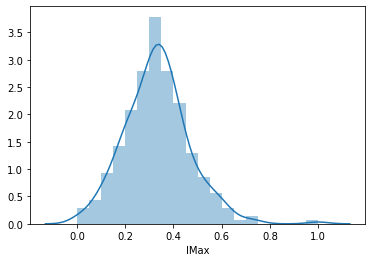

In [29]:
sns.distplot(df_filtered['lMax'])

In [1]:
import sys, os
def importOwnLib():
    if '/home/miruware/aProjects/lib' not in sys.path:
        sys.path.append('/home/miruware/aProjects/lib')
        print("lib path is successfully appended.")
    else:
        print("lib path is already exists.")

importOwnLib()

import sonyalib as sonya
import importlib
importlib.reload(sonya)
import matplotlib.pyplot as plt

lib path is successfully appended.


## len(label_negative), len(label_positive)

In [30]:
label_negative = [df_filtered['lMax'][n] for n, nLabel in enumerate(df_filtered['label']) if int(nLabel) is 0]
label_positive = [df_filtered['lMax'][n] for n, nLabel in enumerate(df_filtered['label']) if int(nLabel) is 1]

In [31]:
random_positive = random.choices(population=label_positive, k=len(label_negative))
tTestResult= stats.ttest_rel(label_negative, random_positive)
 
print("The T-statistic is %.3f and the p-value is %.3f" % tTestResult)

The T-statistic is 2.566 and the p-value is 0.012


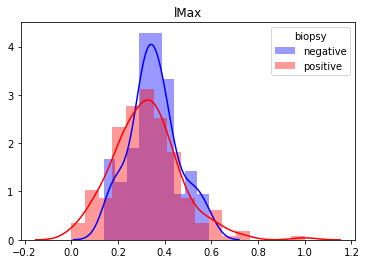

In [32]:
sns.distplot(label_negative, color='blue', label='negative')
sns.distplot(label_positive, color='red', label='positive')
plt.title("lMax")
plt.legend(title="biopsy")
plt.show()
# plt.savefig("./cT.png") ## save to png

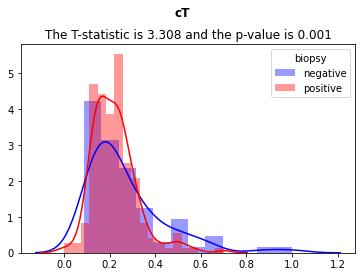

In [76]:
label_negative = [df_filtered['cT'][n] for n, nLabel in enumerate(df_filtered['label']) if int(nLabel) is 0]
label_positive = [df_filtered['cT'][n] for n, nLabel in enumerate(df_filtered['label']) if int(nLabel) is 1]

random_positive = random.choices(population=label_positive, k=len(label_negative))
tTestResult= stats.ttest_rel(label_negative, random_positive)

# print("The T-statistic is %.3f and the p-value is %.3f" % tTestResult)

fig = plt.figure()
fig.suptitle('cT', fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title("The T-statistic is %.3f and the p-value is %.3f" % tTestResult)

sns.distplot(label_negative, color='blue', label='negative')
sns.distplot(label_positive, color='red', label='positive')
# plt.title("cT")
plt.legend(title="biopsy")
plt.show()
# plt.savefig("./cT.png") ## save to png

In [36]:
properties

['sex',
 'LR',
 'age',
 'cT',
 'aAverage',
 'aSD',
 'cAverage',
 'cSD',
 'lMax',
 'AorCa',
 'LymAo',
 'LymCa',
 'homogeneous',
 'cN',
 'hetero',
 'rim',
 'clustered',
 'non-mass']

In [5]:
PATH_EXCEL = './BRC_input_201116.xlsx'
metadata = sonya.get_original_metadata(PATH_EXCEL)

df_filtered = metadata.dropna(axis=0, how='any').reset_index(drop=True)  # NaN drop
properties = list(metadata.columns.values)
properties.remove('label')
X_origin = metadata[properties]
y_origin = metadata['label']

FileNotFoundError: [Errno 2] No such file or directory: './BRC_input_201116.xlsx'

0 sex nan
1 age 0.00227929276071612


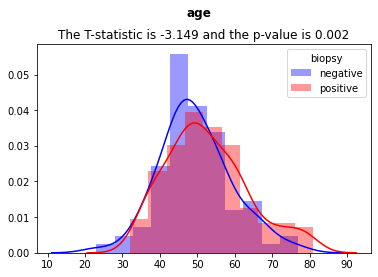

2 LR 0.7410552827700596
3 cT 0.0528242373506147
4 cN 0.0001038240885420675


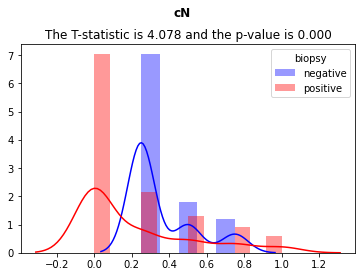

5 cAverage 0.7345314527335411
6 cSD 0.6773907940600643
7 aAverage 0.14454706871502562
8 aSD 0.8903175226098132
9 lMax 0.012926199247780382


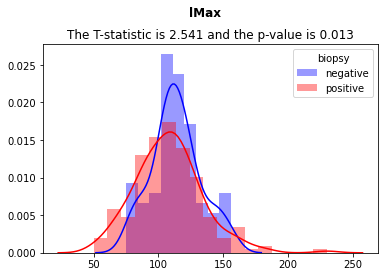

10 homogeneous 0.014523824412143683


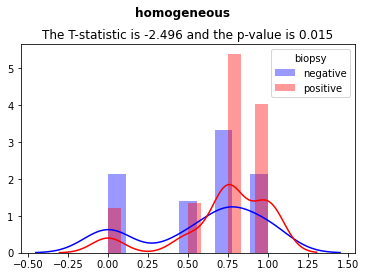

11 hetero nan
12 rim 0.08324186344820757
13 clustered 0.3202170191670507
14 non-mass 0.011547056490564336


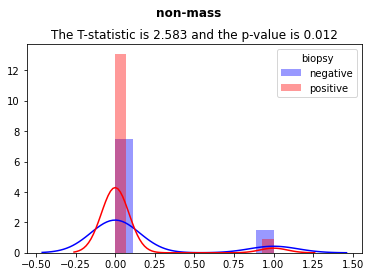

15 AorCa 0.4064829225816473
16 LymAo 0.015278912464308904


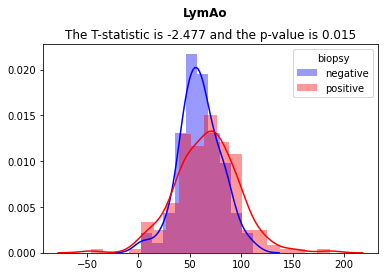

17 LymCa 0.9348859033105658


In [14]:
for i, feature in enumerate(properties):
#     print(i, feature)
    label_negative = [df_filtered[feature][n] for n, nLabel in enumerate(df_filtered['label']) if int(nLabel) is 0]
    label_positive = [df_filtered[feature][n] for n, nLabel in enumerate(df_filtered['label']) if int(nLabel) is 1]

    random_positive = random.choices(population=label_positive, k=len(label_negative))
    tTestResult= stats.ttest_rel(label_negative, random_positive)
    print(i, feature, tTestResult[1])
    # print("The T-statistic is %.3f and the p-value is %.3f" % tTestResult)
    if tTestResult[1] < 0.05:
        
        sns_plot = sns.distplot(label_negative, color='blue', label='negative')
        sns_plot = sns.distplot(label_positive, color='red', label='positive')

        fig = sns_plot.get_figure()
        fig.suptitle(feature, fontweight='bold')
        ax = fig.add_subplot(111)
        fig.subplots_adjust(top=0.85)
        ax.set_title("The T-statistic is %.3f and the p-value is %.3f" % tTestResult)

        plt.legend(title="biopsy")

        plt.savefig("./t_test/original_"+str(feature.replace("/","_"))+".png", transparent=False) ## save to png
        plt.show()
        

In [7]:
!pwd

/home/miruware/aProjects


In [10]:
PATH_EXCEL = '/home/miruware/aProjects/BRC_metastasis/BRC_input_201116.xlsx'
metadata = sonya.get_normalized_metadata(PATH_EXCEL)

df_filtered = metadata.dropna(axis=0, how='any').reset_index(drop=True)  # NaN drop
properties = list(metadata.columns.values)
properties.remove('label')
X_origin = metadata[properties]
y_origin = metadata['label']

0 sex 0.15853877120393534
1 age 0.1547355231088641
2 LR 1.0
3 cT 0.04609904178815537


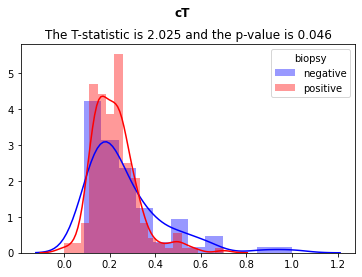

4 cN 3.1418271208201446e-06


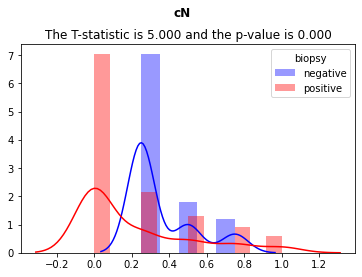

5 cAverage 0.2214392991258681
6 cSD 0.9326593841297222
7 aAverage 0.7387568583496937
8 aSD 0.09723057641017284
9 lMax 0.26117968638658656
10 homogeneous 0.000932131258960859


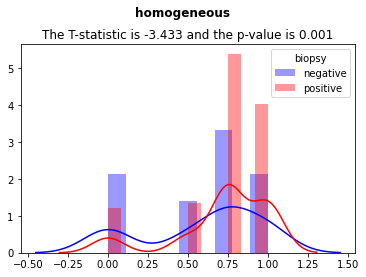

11 hetero 0.3202170191670507
12 rim 0.08324186344820757
13 clustered 0.3202170191670507
14 non-mass 0.011547056490564336


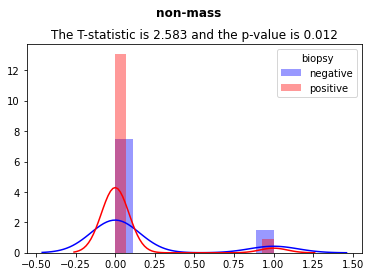

15 AorCa 0.1622146973545245
16 LymAo 0.011221769490678775


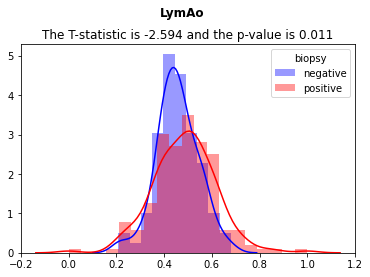

17 LymCa 0.8931188483552039


In [19]:
for i, feature in enumerate(properties):
#     print(i, feature)
    label_negative = [df_filtered[feature][n] for n, nLabel in enumerate(df_filtered['label']) if int(nLabel) is 0]
    label_positive = [df_filtered[feature][n] for n, nLabel in enumerate(df_filtered['label']) if int(nLabel) is 1]

    random_positive = random.choices(population=label_positive, k=len(label_negative))
    tTestResult= stats.ttest_rel(label_negative, random_positive)
    print(i, feature, tTestResult[1])
    # print("The T-statistic is %.3f and the p-value is %.3f" % tTestResult)
    if tTestResult[1] < 0.05:
        
        sns_plot = sns.distplot(label_negative, color='blue', label='negative')
        sns_plot = sns.distplot(label_positive, color='red', label='positive')

        fig = sns_plot.get_figure()
        fig.suptitle(feature, fontweight='bold')
        ax = fig.add_subplot(111)
        fig.subplots_adjust(top=0.85)
        ax.set_title("The T-statistic is %.3f and the p-value is %.3f" % tTestResult)

        plt.legend(title="biopsy")

        plt.savefig("./t_test/normalized_"+str(feature.replace("/","_"))+".png", transparent=False) ## save to png
        plt.show()